<a href="https://colab.research.google.com/github/andsonandreribeiro09/Oficina_Regressao_Linear/blob/main/Modelo_Entidade_Relacionamento_(ER).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛍️ Voltado para Negócios:

##Quando o Cliente Vai Comprar? Estimando o Tempo de Aquisição com Preço Corrigido pela Inflação

✅ Objetivo Geral Requerido

Desenvolver um modelo de análise baseado em regressão linear, partindo de um modelo Entidade-Relacionamento (ER) construído a partir do domínio do problema.

💡 Sua ideia do projeto

Prever o tempo necessário para que um cliente possa adquirir um produto X, considerando que ele tem um a um valor fixo (ex: R$50). Os dados disponíveis incluem cliente, preços dos produtos e compras realizadas.

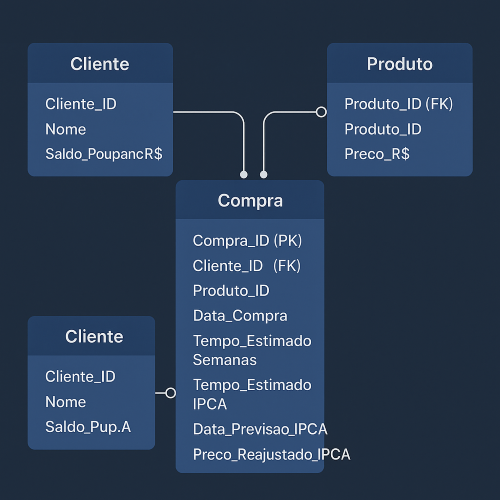

# Diagrama Entidade-Relacionamento (ER)

## Entidades e Atributos

### Cliente
- **Cliente_ID** (PK)
- Nome
- Saldo_Poupanca_R$

### Produto
- **Produto_ID** (PK)
- Nome_Produto
- Preco_R$

### Compra
- **Compra_ID** (PK)
- Cliente_ID (FK) → Cliente
- Produto_ID (FK) → Produto
- Data_Compra
- Tempo_Estimado_Semanas
- Tempo_Estimado_IPCA
- Data_Previsao_IPCA
- Preco_Reajustado_IPCA

---

## Relacionamentos

- **Cliente 1 ——< Compra**
  - Um cliente pode realizar várias compras (1:N)
- **Produto 1 ——< Compra**
  - Um produto pode estar em várias compras (1:N)
- **Compra >—— 1 Cliente**
- **Compra >—— 1 Produto**

---

## Visual Simplificado (Texto)

Relações:
Cliente 1 ——< Compra >—— 1 Produto

O projeto seguiu as etapas do CRISP-DM:

iniciou-se com a compreensão do negócio, focando na previsão do tempo necessário para um cliente adquirir um produto com base no saldo da poupança; em seguida, passou pela compreensão dos dados e preparação dos dados, com a organização das entidades Cliente, Produto e Compra. A modelagem foi realizada com regressão linear, seguida por avaliação com análise visual e comparação de previsões.

Por fim, na etapa de implantação, foram adicionadas previsões realistas considerando a inflação via API do Banco Central, permitindo a simulação de cenários futuros com preços reajustados.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
produto = pd.read_csv('produto.csv')
cliente = pd.read_csv('cliente.csv')
compra = pd.read_csv('compra.csv')

In [ ]:
produto

,Produto_ID,Nome_Produto,Preco_R$
0,1,Smartphone X,1200
1,2,Notebook Y,3000
2,3,Fones Bluetooth,250
3,4,Bicicleta Z,1500
4,5,TV Smart,2800
5,6,Console Game,2500
6,7,Câmera Digital,1800
7,8,Tablet,1100
8,9,Impressora,650
9,10,Relógio Smart,450


In [ ]:
# Lista de saldos correspondentes a cada cliente
saldos = [150, 80, 120, 50, 200]

# Adicionando a coluna saldo
cliente['Saldo_Poupanca_R$'] = saldos

print(cliente)

   Cliente_ID           Nome  Saldo_Poupanca_R$
0           1      Ana Souza                150
1           2    Bruno Costa                 80
2           3     Carla Lima                120
3           4  Diego Martins                 50
4           5    Elisa Rocha                200


In [19]:
cliente

,Cliente_ID,Nome,Saldo_Poupanca_R$
0,1,Ana Souza,150
1,2,Bruno Costa,80
2,3,Carla Lima,120
3,4,Diego Martins,50
4,5,Elisa Rocha,200


In [ ]:
compra

,Compra_ID,Cliente_ID,Produto_ID,Data_Compra
0,1,1,1,2025-03-12
1,2,2,3,2025-03-15
2,3,3,6,2025-04-10
3,4,4,4,2025-04-20
4,5,5,2,2025-05-05
5,6,1,7,2025-05-12
6,7,2,5,2025-05-15
7,8,3,9,2025-05-18
8,9,4,10,2025-05-25
9,10,5,8,2025-06-01


In [ ]:
compra['Data_Compra'] = pd.to_datetime(compra['Data_Compra'])


In [ ]:
# Merge compra + produto + cliente
compra_produto_cliente = compra.merge(produto, on='Produto_ID').merge(cliente, on='Cliente_ID')

In [ ]:
# Calcular Tempo_Estimado_Semanas considerando saldo na poupança
compra_produto_cliente['Tempo_Estimado_Semanas'] = (
    (compra_produto_cliente['Preco_R$'] - compra_produto_cliente['Saldo_Poupanca_R$']) / 50
).clip(lower=0)  # Garante que não haja tempo negativo

In [ ]:
compra_produto_cliente

,Compra_ID,Cliente_ID,Produto_ID,Data_Compra,Nome_Produto,Preco_R$,Nome,Saldo_Poupanca_R$,Tempo_Estimado_Semanas
0,1,1,1,2025-03-12,Smartphone X,1200,Ana Souza,150,21.0
1,2,2,3,2025-03-15,Fones Bluetooth,250,Bruno Costa,80,3.4
2,3,3,6,2025-04-10,Console Game,2500,Carla Lima,120,47.6
3,4,4,4,2025-04-20,Bicicleta Z,1500,Diego Martins,50,29.0
4,5,5,2,2025-05-05,Notebook Y,3000,Elisa Rocha,200,56.0
5,6,1,7,2025-05-12,Câmera Digital,1800,Ana Souza,150,33.0
6,7,2,5,2025-05-15,TV Smart,2800,Bruno Costa,80,54.4
7,8,3,9,2025-05-18,Impressora,650,Carla Lima,120,10.6
8,9,4,10,2025-05-25,Relógio Smart,450,Diego Martins,50,8.0
9,10,5,8,2025-06-01,Tablet,1100,Elisa Rocha,200,18.0


In [ ]:
# Definindo as variáveis
X = compra_produto_cliente[['Preco_R$', 'Saldo_Poupanca_R$']].values
y = compra_produto_cliente['Tempo_Estimado_Semanas'].values

In [ ]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [ ]:
# Mostrando os coeficientes
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")

Coeficientes: [ 0.02 -0.02]
Intercepto: 0.0


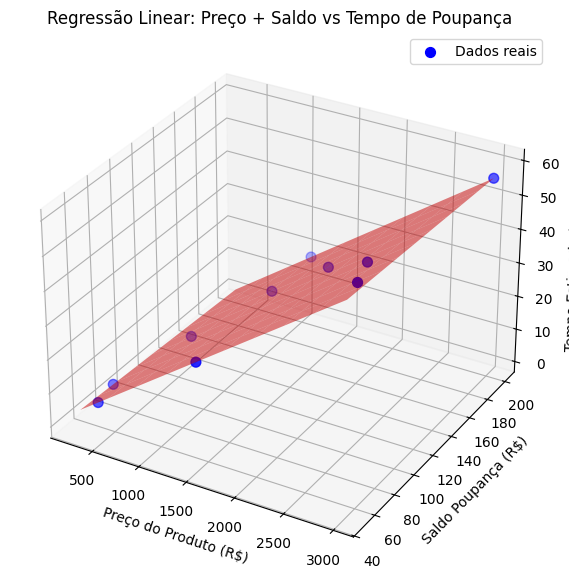

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Dados reais
ax.scatter(
    compra_produto_cliente['Preco_R$'],
    compra_produto_cliente['Saldo_Poupanca_R$'],
    compra_produto_cliente['Tempo_Estimado_Semanas'],
    color='blue', s=50, label='Dados reais'
)

# Superfície de regressão
preco_range = np.linspace(compra_produto_cliente['Preco_R$'].min(), compra_produto_cliente['Preco_R$'].max(), 10)
saldo_range = np.linspace(compra_produto_cliente['Saldo_Poupanca_R$'].min(), compra_produto_cliente['Saldo_Poupanca_R$'].max(), 10)

preco_grid, saldo_grid = np.meshgrid(preco_range, saldo_range)
tempo_predito = modelo.predict(np.c_[preco_grid.ravel(), saldo_grid.ravel()]).reshape(preco_grid.shape)

ax.plot_surface(preco_grid, saldo_grid, tempo_predito, color='red', alpha=0.5)

# Labels
ax.set_xlabel('Preço do Produto (R$)')
ax.set_ylabel('Saldo Poupança (R$)')
ax.set_zlabel('Tempo Estimado (semanas)')
ax.set_title('Regressão Linear: Preço + Saldo vs Tempo de Poupança')
ax.legend()
plt.show()


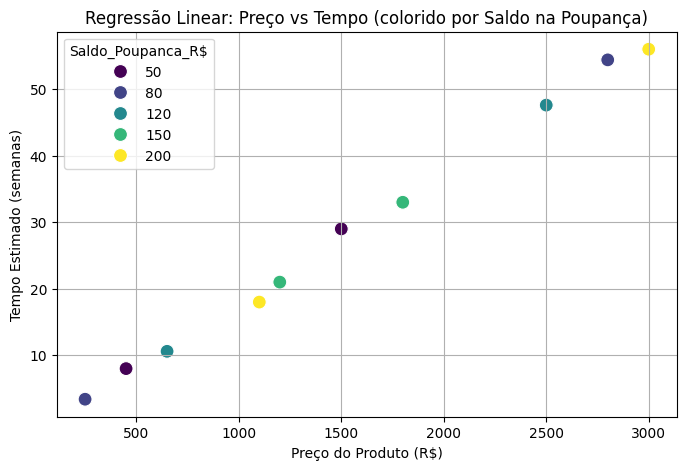

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Preco_R$',
    y='Tempo_Estimado_Semanas',
    hue='Saldo_Poupanca_R$',
    palette='viridis',
    data=compra_produto_cliente,
    s=100
)
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Tempo Estimado (semanas)')
plt.title('Regressão Linear: Preço vs Tempo (colorido por Saldo na Poupança)')
plt.grid(True)
plt.show()

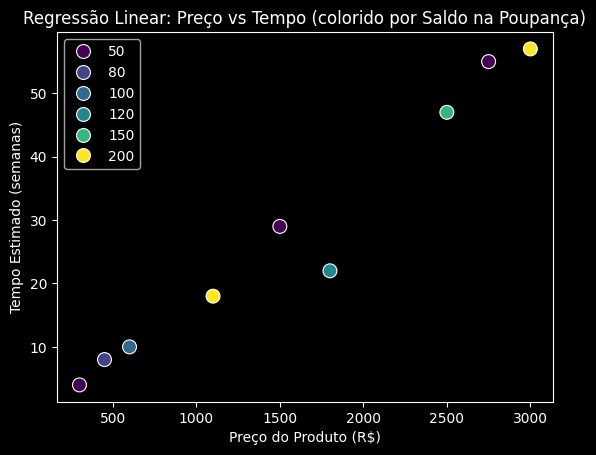

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados fictícios
df = pd.DataFrame({
    'Preco_R$': [300, 450, 600, 1100, 1500, 1800, 2500, 2750, 3000],
    'Tempo_Semanas': [4, 8, 10, 18, 29, 22, 47, 55, 57],
    'Saldo_Poupanca_R$': [50, 80, 100, 200, 50, 120, 150, 50, 200]
})

# Configuração do estilo com fundo preto
plt.style.use('dark_background')
fig, ax = plt.subplots()

# Scatterplot com cor pelo saldo da poupança
sns.scatterplot(
    data=df,
    x='Preco_R$',
    y='Tempo_Semanas',
    hue='Saldo_Poupanca_R$',
    palette='viridis',
    s=100,
    ax=ax
)

# Título e rótulos
ax.set_title('Regressão Linear: Preço vs Tempo (colorido por Saldo na Poupança)', color='white')
ax.set_xlabel('Preço do Produto (R$)', color='white')
ax.set_ylabel('Tempo Estimado (semanas)', color='white')

# Estilizando eixos e legenda
ax.tick_params(colors='white')
legend = ax.legend()
legend.get_frame().set_facecolor('black')
for text in legend.get_texts():
    text.set_color('white')

plt.show()


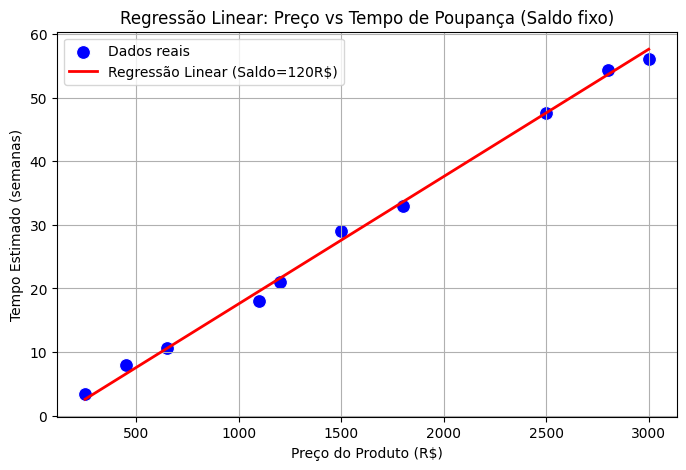

In [ ]:
saldo_fixo = compra_produto_cliente['Saldo_Poupanca_R$'].mean()

# Geração da linha de regressão
X_pred = np.linspace(compra_produto_cliente['Preco_R$'].min(), compra_produto_cliente['Preco_R$'].max(), 100)
X_input = np.c_[X_pred, np.full_like(X_pred, saldo_fixo)]
y_pred = modelo.predict(X_input)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Preco_R$', y='Tempo_Estimado_Semanas', data=compra_produto_cliente, s=100, color='blue', label='Dados reais')
plt.plot(X_pred, y_pred, color='red', linewidth=2, label=f'Regressão Linear (Saldo={saldo_fixo:.0f}R$)')
plt.xlabel('Preço do Produto (R$)')
plt.ylabel('Tempo Estimado (semanas)')
plt.title('Regressão Linear: Preço vs Tempo de Poupança (Saldo fixo)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def simular_tempo_com_modelo(nome_cliente, nome_produto):
    try:
        cliente_info = cliente[cliente['Nome'] == nome_cliente].iloc[0]
        produto_info = produto[produto['Nome_Produto'] == nome_produto].iloc[0]
    except IndexError:
        print("❌ Cliente ou Produto não encontrado!")
        return None

    preco = produto_info['Preco_R$']
    saldo = cliente_info['Saldo_Poupanca_R$']

    # 🚀 Fazer a previsão
    entrada = np.array([[preco, saldo]])
    tempo_estimado = modelo.predict(entrada)[0]

    tempo_estimado = max(0, tempo_estimado)  # não permitir valor negativo

    print(f"🧑 Cliente: {nome_cliente}")
    print(f"🛍️ Produto: {nome_produto}")
    print(f"💰 Saldo atual: R${saldo}")
    print(f"🏷️ Preço do produto: R${preco}")
    print(f"⏳ Tempo estimado para compra (modelo): {round(tempo_estimado, 2)} semanas\n")

    return tempo_estimado
simular_tempo_com_modelo('Ana Souza', 'TV Smart')

🧑 Cliente: Ana Souza
🛍️ Produto: TV Smart
💰 Saldo atual: R$150
🏷️ Preço do produto: R$2800
⏳ Tempo estimado para compra (modelo): 53.0 semanas



np.float64(53.0)

In [ ]:
def obter_inflacao_ipca(data_inicial, data_final):
    hoje = pd.Timestamp.today()
    if data_inicial > hoje or data_final > hoje:
        # Datas futuras: usar inflação projetada anual (exemplo 5%)
        dias = (data_final - data_inicial).days
        inflacao_anual = 0.05
        inflacao_projetada = (1 + inflacao_anual) ** (dias / 365) - 1
        return inflacao_projetada

    # Caso contrário, consulta API normalmente
    data_inicial_str = data_inicial.strftime('%d/%m/%Y')
    data_final_str = data_final.strftime('%d/%m/%Y')

    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json&dataInicial={data_inicial_str}&dataFinal={data_final_str}'

    resposta = requests.get(url)
    if resposta.status_code != 200:
        print(f"⚠️ Aviso: erro na consulta da inflação: Erro ao consultar API do BCB: {resposta.status_code}")
        return 0.0

    dados = resposta.json()
    if not dados:
        return 0.0

    df_ipca = pd.DataFrame(dados)
    df_ipca['data'] = pd.to_datetime(df_ipca['data'], dayfirst=True)
    df_ipca['valor'] = pd.to_numeric(df_ipca['valor'])

    fatores = 1 + (df_ipca['valor'] / 100)
    inflacao_acumulada = fatores.prod() - 1

    return inflacao_acumulada

In [ ]:
def prever_tempo_data_reajuste_ipca(row, modelo, iteracoes=3):
    preco = row['Preco_R$']
    saldo = row['Saldo_Poupanca_R$']
    data_compra = row['Data_Compra']

    preco_ajustado = preco

    for _ in range(iteracoes):
        tempo_estimado = modelo.predict([[preco_ajustado, saldo]])[0]
        tempo_estimado = max(0, tempo_estimado)

        data_previsao = data_compra + pd.to_timedelta(tempo_estimado * 7, unit='D')

        try:
            inflacao = obter_inflacao_ipca(data_compra, data_previsao)
        except Exception as e:
            print(f"Aviso: erro na consulta da inflação: {e}")
            inflacao = 0

        preco_ajustado = preco * (1 + inflacao)

    return pd.Series([tempo_estimado, data_previsao, preco_ajustado])


In [ ]:
compra_produto_cliente[['Tempo_Estimado_IPCA', 'Data_Previsao_IPCA', 'Preco_Reajustado_IPCA']] = \
    compra_produto_cliente.apply(prever_tempo_data_reajuste_ipca, axis=1, modelo=modelo)

print(compra_produto_cliente[['Nome', 'Nome_Produto', 'Preco_R$', 'Data_Compra',
                             'Data_Previsao_IPCA', 'Preco_Reajustado_IPCA', 'Tempo_Estimado_IPCA']])


            Nome     Nome_Produto  Preco_R$ Data_Compra  \
0      Ana Souza     Smartphone X      1200  2025-03-12   
1    Bruno Costa  Fones Bluetooth       250  2025-03-15   
2     Carla Lima     Console Game      2500  2025-04-10   
3  Diego Martins      Bicicleta Z      1500  2025-04-20   
4    Elisa Rocha       Notebook Y      3000  2025-05-05   
5      Ana Souza   Câmera Digital      1800  2025-05-12   
6    Bruno Costa         TV Smart      2800  2025-05-15   
7     Carla Lima       Impressora       650  2025-05-18   
8  Diego Martins    Relógio Smart       450  2025-05-25   
9    Elisa Rocha           Tablet      1100  2025-06-01   

             Data_Previsao_IPCA  Preco_Reajustado_IPCA  Tempo_Estimado_IPCA  
0 2025-08-09 09:39:38.072989393            1224.303743            21.486075  
1 2025-04-08 03:32:10.417920000             252.481020             3.449620  
2 2026-03-25 21:57:23.076581034            2619.391789            49.987836  
3 2025-11-14 22:05:49.040859638       

In [ ]:
compra_produto_cliente

,Compra_ID,Cliente_ID,Produto_ID,Data_Compra,Nome_Produto,Preco_R$,Nome,Saldo_Poupanca_R$,Tempo_Estimado_Semanas,Tempo_Estimado_IPCA,Data_Previsao_IPCA,Preco_Reajustado_IPCA
0,1,1,1,2025-03-12,Smartphone X,1200,Ana Souza,150,21.0,21.486075,2025-08-09 09:39:38.072989393,1224.303743
1,2,2,3,2025-03-15,Fones Bluetooth,250,Bruno Costa,80,3.4,3.449620,2025-04-08 03:32:10.417920000,252.481020
2,3,3,6,2025-04-10,Console Game,2500,Carla Lima,120,47.6,49.987836,2026-03-25 21:57:23.076581034,2619.391789
3,4,4,4,2025-04-20,Bicicleta Z,1500,Diego Martins,50,29.0,29.845815,2025-11-14 22:05:49.040859638,1542.290761
4,5,5,2,2025-05-05,Notebook Y,3000,Elisa Rocha,200,56.0,59.413999,2026-06-24 21:33:06.493787524,3171.123803
5,6,1,7,2025-05-12,Câmera Digital,1800,Ana Souza,150,33.0,34.163712,2026-01-06 03:30:12.963973749,1858.433999
6,7,2,5,2025-05-15,TV Smart,2800,Bruno Costa,80,54.4,57.483638,2026-06-21 09:15:04.340686685,2954.576823
7,8,3,9,2025-05-18,Impressora,650,Carla Lima,120,10.6,10.730985,2025-08-01 02:48:19.959255622,656.549269
8,9,4,10,2025-05-25,Relógio Smart,450,Diego Martins,50,8.0,8.067623,2025-07-20 11:21:38.579888453,453.381166
9,10,5,8,2025-06-01,Tablet,1100,Elisa Rocha,200,18.0,18.379658,2025-10-07 15:46:57.259543339,1118.982908


🎬 Título do Vídeo

"Quando o Cliente Pode Comprar? Previsão com Regressão Linear e Correção por Inflação"

⏱️ Duração: 3 minutos

🎙️ ROTEIRO NARRADO

🎧 [0:00 – 0:15] — Introdução

"Neste vídeo, você vai conhecer um projeto de ciência de dados que responde a uma pergunta simples, mas muito valiosa para o varejo:

Quando um cliente conseguirá comprar um produto?
Usamos aprendizado de máquina, dados reais e correção de preços pela inflação para estimar esse tempo com precisão."

🔹 Animação:

surgem Cliente, Produto e Compra com linhas conectando-os (ER).

🎧 [0:15 – 0:45] — Compreensão do negócio
"Começamos aplicando a metodologia CRISP-DM.

A primeira etapa foi entender o problema: um cliente guarda dinheiro na poupança.

Ele deseja comprar um item — mas em quantas semanas isso será possível?"

🔹 Animação:

Elisa com carrinho, olhando saldo na poupança e produto com preço.

🎧 [0:45 – 1:10] — Coleta e Preparação dos Dados


"Coletamos dados de clientes, produtos e compras.
Organizamos isso num modelo Entidade-Relacionamento, com três tabelas principais: Cliente, Produto e Compra."

🔹 Animação: ER diagram aparece com chave primária e estrangeira.

🎧 [1:10 – 1:35] — Modelagem


"Usamos regressão linear para prever o tempo estimado de compra com base no preço do produto e no saldo atual.
O modelo aprendeu que quanto maior o saldo ou menor o preço, menor o tempo."

🔹 Animação:

Gráfico de dispersão Preço x Tempo, pontos coloridos por saldo.

🎧 [1:35 – 2:00] — Avaliação com IPCA

"Mas na vida real, os preços mudam.
Então integramos uma API do Banco Central para obter o IPCA real, mês a mês, e corrigir o valor dos produtos no tempo."

🔹 Animação:

API → gráfico com inflação acumulada → novo preço reajustado.

🎧 [2:00 – 2:30] — Caso Elisa Rocha


Vamos ver um exemplo.

Elisa Rocha tem 200 reais guardados.
Ela quer comprar um Tablet de 1.100 e um Notebook de
3.000.

O modelo estima que ela conseguirá comprar o tablet em 18 semanas, com preço corrigido para R$1118,98.

Já o notebook só poderá ser comprado em 59 semanas, quando custará R$3171,12."

🔹 Animação:

Linha do tempo com balões de valor futuro e datas previstas.

🎧 [2:30 – 3:00] — Conclusão


"Com esse modelo, é possível simular cenários reais de compra ao longo do tempo,
ajudar empresas no planejamento de marketing e permitir ao cliente acompanhar suas metas financeiras.

Dados, aprendizado de máquina e inflação real — juntos, para prever o futuro."

🔹 Animação final:

gráfico subindo, carrinho de compras se movendo até a meta.

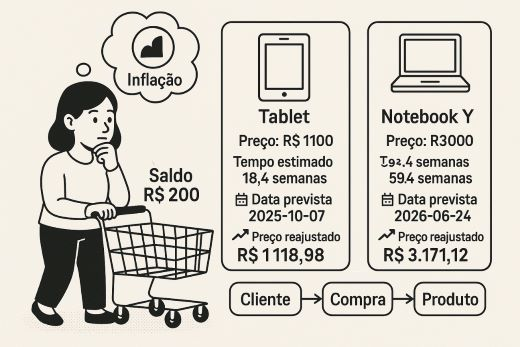


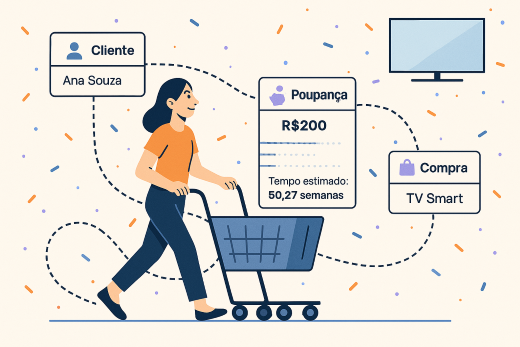